In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#google colab drive mount code

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# reading data file

df = pd.read_csv('/content/gdrive/My Drive/Data/WELFake_Dataset.csv')

     

In [ ]:

df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:

df.columns = ["id","title","text","label"]

In [ ]:

df.head()

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      72134 non-null  int64 
 1   title   71576 non-null  object
 2   text    72095 non-null  object
 3   label   72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
#@title Preprocessing and Feature Extraction Phase { display-mode: "form" }
# read in our data and preprocess it

df.drop(labels=['id','title'], axis='columns', inplace=True)

In [ ]:

df['text']

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72134, dtype: object

In [ ]:

df.dropna(subset = ["text"], inplace=True)

In [ ]:
df['text']

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72095, dtype: object

In [ ]:
# Creating a function for Removing stopwords

from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [ ]:
#Removing stopwords

df['text'] = df.apply(stopword_removal, axis=1)
df['text']

0        No comment expected Barack Obama Members #FYF9...
1                          Did post votes Hillary already?
2        Now, demonstrators gathered night exercising c...
3        A dozen politically active pastors came privat...
4        The RS-28 Sarmat missile, dubbed Satan 2, repl...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed workin...
72130    You know, fantasyland Republicans questioned c...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72095, dtype: object

In [ ]:
# Converting text into smaller letters.

df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
     

<ipython-input-15-a29f616ab6a0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [ ]:
# prepare text samples and their labels

texts = df['text']
labels = df['label']

print('Found %s texts.' %texts.shape[0])

Found 72095 texts.


In [ ]:
#replacing any null values with an empty string (common method provided by pandas)
texts = texts.fillna("")

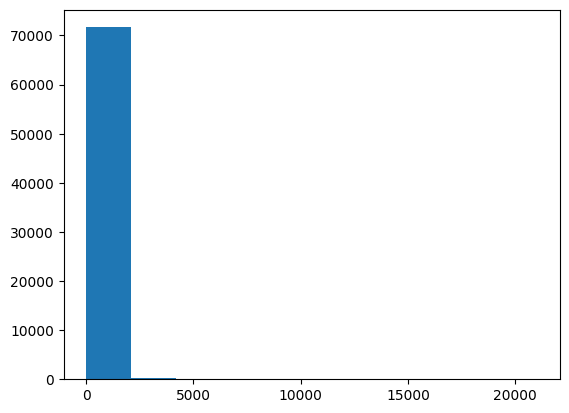

In [ ]:
# plot the distribution of article lengths in terms of word counts

text_lengths = texts.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()
     

In [ ]:
print(texts)



0        no comment expected barack obama members fyf91...
1                          did post votes hillary already 
2        now demonstrators gathered night exercising co...
3        a dozen politically active pastors came privat...
4        the rs 28 sarmat missile dubbed satan 2 replac...
                               ...                        
72129    washington reuters hackers believed working ru...
72130    you know fantasyland republicans questioned ci...
72131    migrants refuse to leave train at refugee camp...
72132    mexico city reuters donald trump s combative s...
72133    goldman sachs endorses hillary clinton for pre...
Name: text, Length: 72095, dtype: object


In [ ]:

MAX_SEQUENCE_LENGTH = 700
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 30
TEST_SPLIT = 0.2

In [ ]:

!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# vectorize the text samples into a 2D integer tensor 

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences

# tokenizing sentences into words 
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

# using fit_on_texts method assigning values to particular words
tokenizer.fit_on_texts(texts)

# texts_to_sequences method is used to give particular integer values to word
sequences = tokenizer.texts_to_sequences(texts)


# calculating word_index
word_index = tokenizer.word_index

num_words = min(MAX_NUM_WORDS, len(word_index)) + 1

#padding data to the same length for each samples
data = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')

num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
     

In [ ]:
#@title Data Curation Phase { vertical-output: true, display-mode: "form" }

# split the data into a training set and a validation set   

from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(data, 
                                        labels, 
                                        test_size=0.2, 
                                        )

x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y, 
                                                  test_size=0.1, 
                                                  )

    

    


In [ ]:

x_train.shape

In [ ]:

x_val.shape

In [ ]:
x_test.shape

In [ ]:
#@title Model Building Phase { display-mode: "form" }
from keras.layers import LSTM
from keras.layers.reshaping.flatten import Flatten
from keras.layers.pooling.max_pooling1d import MaxPool1D
from keras.models import Sequential, Model
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, multiply, Permute, Lambda
from keras import backend as K
from keras.optimizers import Adam

# Defining the model architecture
model = Sequential()

# part 1: word and sequence processing

# defining embedding layer where embedding dimension/ vector size is defined as 64 and input length is set as 700. Where num_words are unique words.
model.add(Embedding(input_dim =242766,
                    output_dim = EMBEDDING_DIM, 
                    input_length=MAX_SEQUENCE_LENGTH))

# for defining convolutional layer, number of filters are set as 64 and kernal size is defined as 1 X 5.
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

# maxpooling1d layer is used to take maximum values from representation.
model.add(MaxPool1D(2))

# adding dropout 0.4
model.add(Dropout(rate=0.4))

# creating second convolutional layer with kernal size 1 X 3, and number of filters will be 32. Where activation function will remain same as ReLU.
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# creating maxpooling layer with 2 neurons so that will compare with neighbour neuron. 
model.add(MaxPool1D(2, strides=1))

# adding one more convolutional layer with kernal size 1 X 3, and number of filters will be 16 and setting strides value as 1. Where activation function will be ReLU.
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', strides= 1))

# Adding LSTM layer with 32 units and dropout of 0.3

model.add(LSTM(8,dropout=0.3))

# adding flatten layer
model.add(Flatten())

# adding dense layer with 256 neurons
model.add(Dense(units=256, activation='relu'))

# adding dropout layer of 0.5
model.add(Dropout(rate=0.5))

# adding dense layer with 128 neurons
model.add(Dense(units=128, activation='relu'))

# adding dropout layer of 0.5
model.add(Dropout(rate=0.5))

# Adding attention matrix to the model
attention_probs = Dense(128, activation='softmax', name='attention_probs')(model.layers[-1].output)
attention_mul = multiply([model.layers[-1].output, attention_probs], name='attention_mul')
output_attention = Lambda(lambda x: K.sum(x, axis=1), name='output_attention')(attention_mul)

# output layer contains 1 value because this is binary classification problem.
# Where activation function is 'sigmoid'.
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

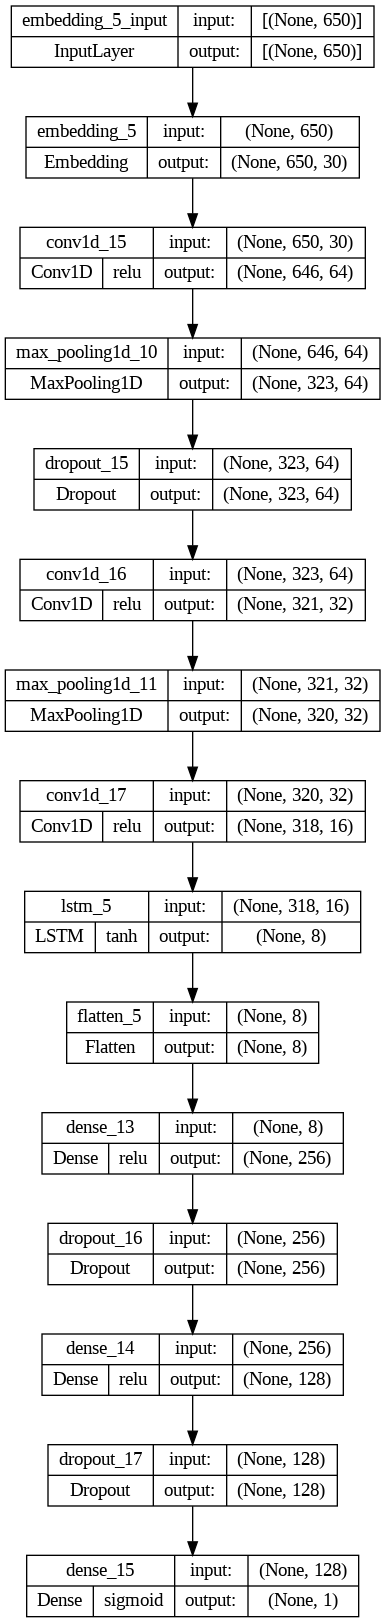

In [ ]:
# visalizing the layers of model.
import tensorflow as tf

tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
#@title Model Training Phase { display-mode: "form" }
# train the model with batch size of 128 and 15 epochs.
import time as t
start = t.time()
history = model.fit(x_train, 
                    y_train,
                    batch_size=120,
                    epochs=30,
                    validation_data=(x_val, y_val))

print("total training time:",t.time()-start)
     

Epoch 1/30
433/433 [==============================] - 21s 42ms/step - loss: 0.0618 - accuracy: 0.9800 - val_loss: 0.0476 - val_accuracy: 0.9847
Epoch 2/30
433/433 [==============================] - 13s 31ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.0750 - val_accuracy: 0.9724
Epoch 3/30
433/433 [==============================] - 10s 24ms/step - loss: 0.0472 - accuracy: 0.9846 - val_loss: 0.0483 - val_accuracy: 0.9839
Epoch 4/30
433/433 [==============================] - 10s 24ms/step - loss: 0.0419 - accuracy: 0.9858 - val_loss: 0.0512 - val_accuracy: 0.9835
Epoch 5/30
433/433 [==============================] - 10s 24ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0540 - val_accuracy: 0.9816
Epoch 6/30
433/433 [==============================] - 11s 25ms/step - loss: 0.0363 - accuracy: 0.9878 - val_loss: 0.0661 - val_accuracy: 0.9790
Epoch 7/30
433/433 [==============================] - 11s 25ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0610 - val_accuracy:

In [ ]:

!pip install keras_flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph
    

In [ ]:
def get_flops(model, batch_size=None):
    if batch_size is None:
        batch_size = 1

    real_model = tf.function(model).get_concrete_function(tf.TensorSpec([batch_size] + model.inputs[0].shape[1:], model.inputs[0].dtype))
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(real_model)

    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph,
                                            run_meta=run_meta, cmd='op', options=opts)
    return flops.total_float_ops

In [ ]:
# calculating flops
flops = get_flops(model, batch_size = 128)
print(flops)
print(f"FLOPS: {flops / 10 ** 9:.03} G ")
     

2242359424
FLOPS: 2.24 G 


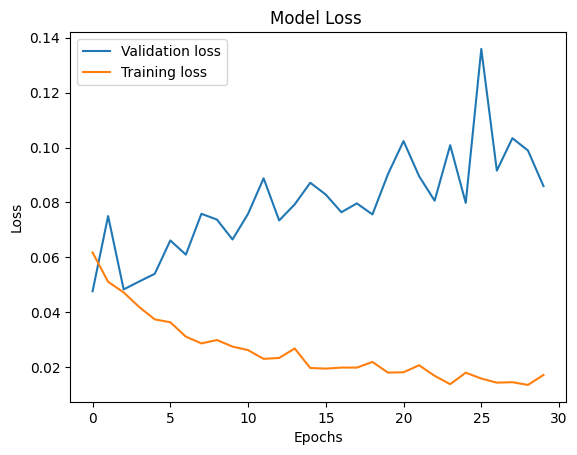

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Validation loss', 'Training loss'], loc='upper left')
plt.show()

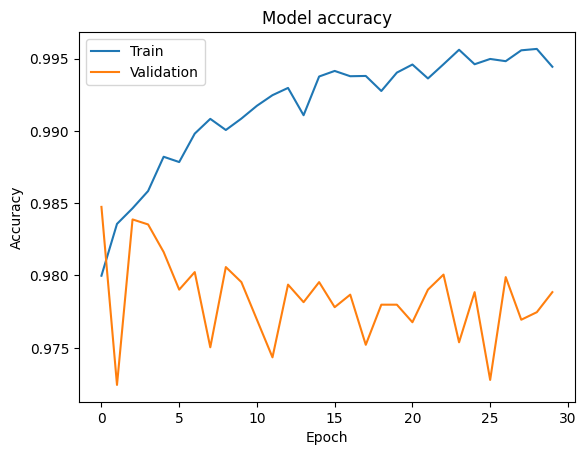

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

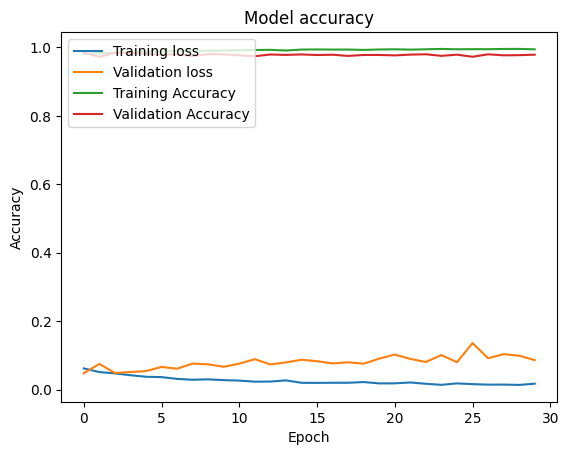

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss','Training Accuracy','Validation Accuracy'], loc='upper left')
plt.show()

In [ ]:
#@title Testing and Evaluation phase { display-mode: "form" }
# define a function that allows us to evaluate models

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,roc_curve
import time 


def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing accuraries are reported
    '''
    # training acc
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing acc
    # start timer for testing
    start_time = time.time()
    y_predict_test = predict_fun(X_test)
    # end timer for testing
    end_time = time.time()
    test_acc = accuracy_score(y_test,y_predict_test)
    # calculate total time and per sample inference time
    total_time = end_time - start_time
    per_sample_time = total_time / len(X_test)
    

    # accuracy = accuracy_score(y_test,y_pred_tex)
    roc_auc =roc_auc_score(y_test, y_predict_test)
    precision = precision_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    recall = recall_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    
    cr = classification_report(y_test, y_predict_test,zero_division=1)


    fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label= 'CNN-LSTM')
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.title('%s ROC Curve'% 'CNN-LSTM',fontsize=20)
    plt.legend(fontsize=12)
    plt.show()

    roc_auc_sc = roc_auc_score(y_test,y_predict_test)

    return train_acc, test_acc,cr,roc_auc_sc, per_sample_time

451/451 [==============================] - 5s 10ms/step


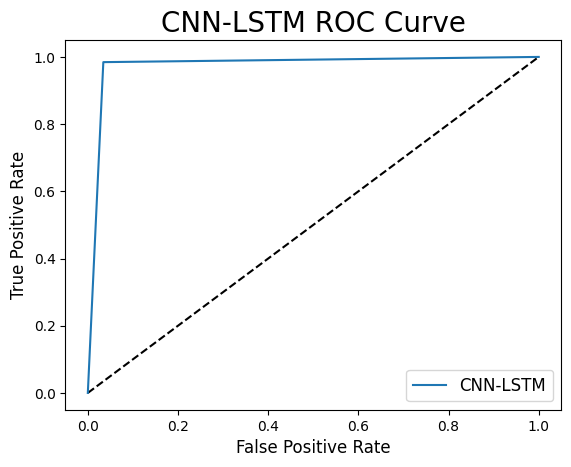

Training Accuracy: 99.93%
Testing Accuracy: 97.53%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      7009
           1       0.97      0.98      0.98      7410

    accuracy                           0.98     14419
   macro avg       0.98      0.98      0.98     14419
weighted avg       0.98      0.98      0.98     14419

AUC score 0.9750480344434733
Total time required for testing 26.906654119491577
per sample 0.0003595680723872212


In [ ]:
# evaluate model
import time as t
start = t.time()
train_acc, test_acc,cr,roc_auc_sc,per_sample_time = evaluate_model(lambda x: np.rint(model.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))
print("Classification Report:\n",cr)
print("AUC score",roc_auc_sc)
print("Total time required for testing",t.time()-start)
print("per sample",per_sample_time)